In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [298]:
data = pd.read_csv('./csgo_round_snapshots.csv')

In [155]:
print(data.shape)
data.head()

(122410, 97)


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [5]:
data.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
data.drop(data.select_dtypes(np.number), axis=1).columns

Index(['map', 'bomb_planted', 'round_winner'], dtype='object')

In [299]:
data['bomb_planted'].value_counts()

False    108726
True      13684
Name: bomb_planted, dtype: int64

In [300]:
data['players_alive'] = data['ct_players_alive']-data['t_players_alive']
data.drop(columns=['ct_players_alive','t_players_alive'], axis=1, inplace=True)

data['score'] = data['ct_score']-data['t_score']
data.drop(columns=['ct_score','t_score'], axis=1, inplace=True)

data['health'] = data['ct_health']-data['t_health']
data.drop(columns=['ct_health','t_health'], axis=1, inplace=True)

data['armor'] = data['ct_armor']-data['t_armor']
data.drop(columns=['ct_armor','t_armor'], axis=1, inplace=True)

data['money'] = data['ct_money']-data['t_money']
data.drop(columns=['ct_money','t_money'], axis=1, inplace=True)

data['helmets'] = data['ct_helmets']-data['t_helmets']
data.drop(columns=['ct_helmets','t_helmets'], axis=1, inplace=True)

data['weapon_ak47'] = data['ct_weapon_ak47']-data['t_weapon_ak47']
data.drop(columns=['ct_weapon_ak47','t_weapon_ak47'], axis=1, inplace=True)

data['weapon_aug'] = data['ct_weapon_aug']-data['t_weapon_aug'] #not so influent
data.drop(columns=['ct_weapon_aug','t_weapon_aug'], axis=1, inplace=True)

data['weapon_awp'] = data['ct_weapon_awp']-data['t_weapon_awp']
data.drop(columns=['ct_weapon_awp','t_weapon_awp'], axis=1, inplace=True)

data['weapon_bizon'] = data['ct_weapon_bizon']-data['t_weapon_bizon']
data.drop(columns=['ct_weapon_bizon','t_weapon_bizon'], axis=1, inplace=True)

data['weapon_cz75auto'] = data['ct_weapon_cz75auto']-data['t_weapon_cz75auto']
data.drop(columns=['ct_weapon_cz75auto','t_weapon_cz75auto'], axis=1, inplace=True)

data['weapon_elite'] = data['ct_weapon_elite']-data['t_weapon_elite']
data.drop(columns=['ct_weapon_elite','t_weapon_elite'], axis=1, inplace=True)

data['weapon_famas'] = data['ct_weapon_famas']-data['t_weapon_famas']
data.drop(columns=['ct_weapon_famas','t_weapon_famas'], axis=1, inplace=True)

data['weapon_g3sg1'] = data['ct_weapon_g3sg1']-data['t_weapon_g3sg1']
data.drop(columns=['ct_weapon_g3sg1','t_weapon_g3sg1'], axis=1, inplace=True)

data['weapon_galilar'] = data['ct_weapon_galilar']-data['t_weapon_galilar']
data.drop(columns=['ct_weapon_galilar','t_weapon_galilar'], axis=1, inplace=True)

data['weapon_glock'] = data['ct_weapon_glock']-data['t_weapon_glock']
data.drop(columns=['ct_weapon_glock','t_weapon_glock'], axis=1, inplace=True)

data['weapon_m249'] = data['ct_weapon_m249']-data['t_weapon_m249']
data.drop(columns=['ct_weapon_m249','t_weapon_m249'], axis=1, inplace=True)

data['weapon_m4a1s'] = data['ct_weapon_m4a1s']-data['t_weapon_m4a1s']
data.drop(columns=['ct_weapon_m4a1s','t_weapon_m4a1s'], axis=1, inplace=True)

data['weapon_m4a4'] = data['ct_weapon_m4a4']-data['t_weapon_m4a4']
data.drop(columns=['ct_weapon_m4a4','t_weapon_m4a4'], axis=1, inplace=True)

data['weapon_mac10'] = data['ct_weapon_mac10']-data['t_weapon_mac10']
data.drop(columns=['ct_weapon_mac10','t_weapon_mac10'], axis=1, inplace=True)

data['weapon_mag7'] = data['ct_weapon_mag7']-data['t_weapon_mag7']
data.drop(columns=['ct_weapon_mag7','t_weapon_mag7'], axis=1, inplace=True)

data['weapon_mp5sd'] = data['ct_weapon_mp5sd']-data['t_weapon_mp5sd']
data.drop(columns=['ct_weapon_mp5sd','t_weapon_mp5sd'], axis=1, inplace=True)

data['weapon_mp7'] = data['ct_weapon_mp7']-data['t_weapon_mp7']
data.drop(columns=['ct_weapon_mp7','t_weapon_mp7'], axis=1, inplace=True)

data['weapon_mp9'] = data['ct_weapon_mp9']-data['t_weapon_mp9']
data.drop(columns=['ct_weapon_mp9','t_weapon_mp9'], axis=1, inplace=True)

data['weapon_negev'] = data['ct_weapon_negev']-data['t_weapon_negev']
data.drop(columns=['ct_weapon_negev','t_weapon_negev'], axis=1, inplace=True)

data['weapon_nova'] = data['ct_weapon_nova']-data['t_weapon_nova']
data.drop(columns=['ct_weapon_nova','t_weapon_nova'], axis=1, inplace=True)

data['weapon_p90'] = data['ct_weapon_p90']-data['t_weapon_p90']
data.drop(columns=['ct_weapon_p90','t_weapon_p90'], axis=1, inplace=True)

data['weapon_r8revolver'] = data['ct_weapon_r8revolver']-data['t_weapon_r8revolver']
data.drop(columns=['ct_weapon_r8revolver','t_weapon_r8revolver'], axis=1, inplace=True)

data['weapon_sawedoff'] = data['ct_weapon_sawedoff']-data['t_weapon_sawedoff']
data.drop(columns=['ct_weapon_sawedoff','t_weapon_sawedoff'], axis=1, inplace=True)

data['weapon_scar20'] = data['ct_weapon_scar20']-data['t_weapon_scar20']
data.drop(columns=['ct_weapon_scar20','t_weapon_scar20'], axis=1, inplace=True)

data['weapon_sg553'] = data['ct_weapon_sg553']-data['t_weapon_sg553']
data.drop(columns=['ct_weapon_sg553','t_weapon_sg553'], axis=1, inplace=True)

data['weapon_ssg08'] = data['ct_weapon_ssg08']-data['t_weapon_ssg08']
data.drop(columns=['ct_weapon_ssg08','t_weapon_ssg08'], axis=1, inplace=True)

data['weapon_ump45'] = data['ct_weapon_ump45']-data['t_weapon_ump45']
data.drop(columns=['ct_weapon_ump45','t_weapon_ump45'], axis=1, inplace=True)

data['weapon_xm1014'] = data['ct_weapon_xm1014']-data['t_weapon_xm1014']
data.drop(columns=['ct_weapon_xm1014','t_weapon_xm1014'], axis=1, inplace=True)

data['weapon_deagle'] = data['ct_weapon_deagle']-data['t_weapon_deagle']
data.drop(columns=['ct_weapon_deagle','t_weapon_deagle'], axis=1, inplace=True)

data['weapon_fiveseven'] = data['ct_weapon_fiveseven']-data['t_weapon_fiveseven']
data.drop(columns=['ct_weapon_fiveseven','t_weapon_fiveseven'], axis=1, inplace=True)

data['weapon_usps'] = data['ct_weapon_usps']-data['t_weapon_usps']
data.drop(columns=['ct_weapon_usps','t_weapon_usps'], axis=1, inplace=True)

data['weapon_p250'] = data['ct_weapon_p250']-data['t_weapon_p250']
data.drop(columns=['ct_weapon_p250','t_weapon_p250'], axis=1, inplace=True)

data['weapon_p2000'] = data['ct_weapon_p2000']-data['t_weapon_p2000']
data.drop(columns=['ct_weapon_p2000','t_weapon_p2000'], axis=1, inplace=True)

data['weapon_tec9'] = data['ct_weapon_tec9']-data['t_weapon_tec9']
data.drop(columns=['ct_weapon_tec9','t_weapon_tec9'], axis=1, inplace=True)

data['grenade_hegrenade'] = data['ct_grenade_hegrenade']-data['t_grenade_hegrenade']
data.drop(columns=['ct_grenade_hegrenade','t_grenade_hegrenade'], axis=1, inplace=True)

data['grenade_flashbang'] = data['ct_grenade_flashbang']-data['t_grenade_flashbang']
data.drop(columns=['ct_grenade_flashbang','t_grenade_flashbang'], axis=1, inplace=True)

data['grenade_smokegrenade'] = data['ct_grenade_smokegrenade']-data['t_grenade_smokegrenade']
data.drop(columns=['ct_grenade_smokegrenade','t_grenade_smokegrenade'], axis=1, inplace=True)

data['grenade_incendiarygrenade'] = data['ct_grenade_incendiarygrenade']-data['t_grenade_incendiarygrenade']
data.drop(columns=['ct_grenade_incendiarygrenade','t_grenade_incendiarygrenade'], axis=1, inplace=True)

data['grenade_molotovgrenade'] = data['ct_grenade_molotovgrenade']-data['t_grenade_molotovgrenade']
data.drop(columns=['ct_grenade_molotovgrenade','t_grenade_molotovgrenade'], axis=1, inplace=True)

data['grenade_decoygrenade'] = data['ct_grenade_decoygrenade']-data['t_grenade_decoygrenade']
data.drop(columns=['ct_grenade_decoygrenade','t_grenade_decoygrenade'], axis=1, inplace=True)

data.drop(columns=['time_left'], axis=1, inplace=True)

data.columns

Index(['map', 'bomb_planted', 'ct_defuse_kits', 'round_winner',
       'players_alive', 'score', 'health', 'armor', 'money', 'helmets',
       'weapon_ak47', 'weapon_aug', 'weapon_awp', 'weapon_bizon',
       'weapon_cz75auto', 'weapon_elite', 'weapon_famas', 'weapon_g3sg1',
       'weapon_galilar', 'weapon_glock', 'weapon_m249', 'weapon_m4a1s',
       'weapon_m4a4', 'weapon_mac10', 'weapon_mag7', 'weapon_mp5sd',
       'weapon_mp7', 'weapon_mp9', 'weapon_negev', 'weapon_nova', 'weapon_p90',
       'weapon_r8revolver', 'weapon_sawedoff', 'weapon_scar20', 'weapon_sg553',
       'weapon_ssg08', 'weapon_ump45', 'weapon_xm1014', 'weapon_deagle',
       'weapon_fiveseven', 'weapon_usps', 'weapon_p250', 'weapon_p2000',
       'weapon_tec9', 'grenade_hegrenade', 'grenade_flashbang',
       'grenade_smokegrenade', 'grenade_incendiarygrenade',
       'grenade_molotovgrenade', 'grenade_decoygrenade'],
      dtype='object')

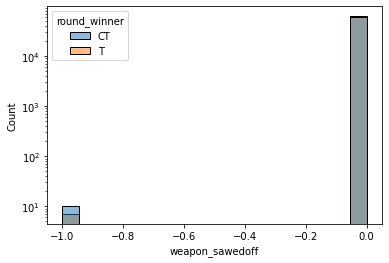

In [247]:
ax = sns.histplot(data=data, x='weapon_sawedoff', hue='round_winner')
ax.set_yscale('log')

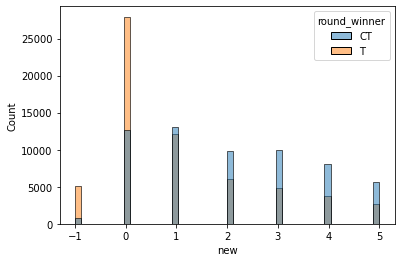

In [296]:
test = data

test['new'] = test['ct_defuse_kits'] - test['bomb_planted']

ax = sns.histplot(data=test, x='new', hue='round_winner')
#ax.set_yscale('log')

In [287]:
weapons = ['weapon_ak47', 'weapon_aug', 'weapon_awp', 'weapon_bizon',
       'weapon_cz75auto', 'weapon_elite', 'weapon_famas', 'weapon_g3sg1',
       'weapon_galilar', 'weapon_glock', 'weapon_m249', 'weapon_m4a1s',
       'weapon_m4a4', 'weapon_mac10', 'weapon_mag7', 'weapon_mp5sd',
       'weapon_mp7', 'weapon_mp9', 'weapon_negev', 'weapon_nova', 'weapon_p90',
       'weapon_r8revolver', 'weapon_sawedoff', 'weapon_scar20', 'weapon_sg553',
       'weapon_ssg08', 'weapon_ump45', 'weapon_xm1014', 'weapon_deagle',
       'weapon_fiveseven', 'weapon_usps', 'weapon_p250', 'weapon_p2000',
       'weapon_tec9']

granades = ['grenade_hegrenade', 'grenade_flashbang',
       'grenade_smokegrenade', 'grenade_incendiarygrenade',
       'grenade_molotovgrenade', 'grenade_decoygrenade']


data['weapons'] = data[weapons].sum(axis=1)
data['granades'] = data[granades].sum(axis=1)

data.drop(columns=weapons, axis=1, inplace=True)
data.drop(columns=granades, axis=1, inplace=True)

In [288]:
data.columns

Index(['map', 'bomb_planted', 'ct_defuse_kits', 'round_winner',
       'players_alive', 'score', 'health', 'armor', 'money', 'helmets',
       'weapons', 'granades'],
      dtype='object')

In [289]:
data = data.sample(frac=1).reset_index(drop=True)

y = data['round_winner']
X = data.drop(columns='round_winner')

In [290]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()

y = lEncoder.fit_transform(y)

In [291]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X.shape, X_train.shape, X_test.shape

((122410, 11), (82014, 11), (40396, 11))

In [292]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


numeric_features = ['ct_defuse_kits',
       'players_alive', 'score', 'health', 'armor', 'money', 'helmets',
       'weapons', 'granades']
numeric_transformer = Pipeline(steps=[
    ('robust', RobustScaler())
    ,('standard', StandardScaler())
    ])

categorical_features = ['map']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

boolean_features = ['bomb_planted']
boolean_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('b', boolean_transformer, boolean_features)
        ])

pre = Pipeline(steps=[('preprocessor', preprocessor)])

X_train = pd.DataFrame(pre.fit_transform(X_train))
X_test = pd.DataFrame(pre.transform(X_test))

In [293]:
cols = numeric_features + ['de_inferno','de_dust2','de_nuke','de_mirage','de_overpass','de_train','de_vertigo','de_cache'] +  boolean_features
X_train.columns = cols
X_test.columns = cols

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

log_model = LogisticRegression()
xgbc = XGBClassifier()
dtc = DecisionTreeClassifier(random_state=111)
knc = KNeighborsClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier(random_state=111)
abc = AdaBoostClassifier(random_state=111)
bc = BaggingClassifier(random_state=111)
etc = ExtraTreesClassifier(random_state=111)


In [257]:
log_model.fit(X_train, y_train)
xgbc.fit(X_train, y_train)
dtc.fit(X_train, y_train)
knc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
abc.fit(X_train, y_train)
bc.fit(X_train, y_train)
etc.fit(X_train, y_train)

C:\Users\juanm\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:38:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ExtraTreesClassifier(random_state=111)

In [260]:
from sklearn.metrics import f1_score

print('log_model', f1_score(log_model.predict(X_test), y_test))
print('xgbc', f1_score(xgbc.predict(X_test), y_test))
print('dtc', f1_score(dtc.predict(X_test), y_test))
print('knc', f1_score(knc.predict(X_test), y_test))
print('lrc', f1_score(lrc.predict(X_test), y_test))
print('rfc', f1_score(rfc.predict(X_test), y_test))
print('abc', f1_score(abc.predict(X_test), y_test))
print('bc', f1_score(bc.predict(X_test), y_test))
print('etc', f1_score(etc.predict(X_test), y_test))

log_model 0.7500181479420234
xgbc 0.7744527915741134
dtc 0.7819343510705751
knc 0.7847680500562154
lrc 0.7500181479420234
rfc 0.8384059935431402
abc 0.7407666200838492
bc 0.8080449870814125
etc 0.8385480622820375


In [264]:
from sklearn.model_selection import GridSearchCV

search_space = {
      "n_estimators":[100, 120, 150],
      "max_features":['auto', 'log2'],
      "bootstrap": [True, False],
      "random_state":[111]
      }

In [265]:
grid = GridSearchCV(estimator=RandomForestClassifier(), 
                    param_grid=search_space,
                    cv=3,
                    scoring='f1_macro',  # Accuracy
                    return_train_score=True,
                    n_jobs=-1,  # AUC == ROC
                    verbose=10) 

In [266]:
best_model = grid.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed:  2.1min remaining:   56.2s
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed:  2.3min remaining:   32.6s
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed:  2.6min remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  2.7min finished


In [267]:
print(best_model.best_params_)

{'bootstrap': False, 'max_features': 'auto', 'n_estimators': 150, 'random_state': 111}


In [294]:
rfc_best = RandomForestClassifier(bootstrap=False, n_estimators=150)

rfc_best.fit(X_train, y_train)

print('rfc', rfc_best.score(X_test, y_test))

rfc 0.8563719180116843


Text(0.5, 0, 'Random Forest Feature Importance')

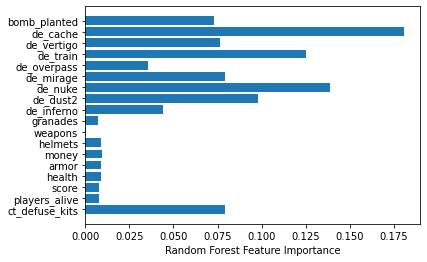

In [295]:
sorted_idx = rfc_best.feature_importances_.argsort()
plt.barh(X_train.columns, rfc.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [306]:
print(rfc_best.feature_importances_)


[0.04636853 0.03695585 0.09267197 0.08543101 0.20131431 0.1503669
 0.09483587 0.13823948 0.08324129 0.00040565 0.0095358  0.0087872
 0.00918303 0.00867624 0.00792101 0.00757533 0.00727346 0.01121707]
